In [1]:
import pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
from pyspark.sql.functions import col

In [4]:
from pyspark.sql.functions import desc

In [5]:
from pyspark.sql.functions import asc

In [6]:
import findspark

In [7]:
findspark.init()

In [9]:
spark = SparkSession.builder.appName('ShortMHurdles').getOrCreate()

## Import Data

In [10]:
Mens110mHurdles = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','Mens110mHurdles.csv').load()

In [11]:
Womens100mHurdles = spark.read.format('csv').option('inferSchema','true').option('header','true').option('path','Women100mHurdles.csv').load()

In [12]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

## Create View

In [13]:
Mens110mHurdles.createOrReplaceTempView("Mens110mHurdles")

In [14]:
Womens100mHurdles.createOrReplaceTempView("Womens100mHurdles")

## Basic Selection

In [15]:
resultone = spark.sql("SELECT * FROM Mens110mHurdles")
resultone.show()

+--------------------+-----+-------------+
|               Names|Times|      Schools|
+--------------------+-----+-------------+
|(1) Grant HOLLOWAYJR|12.98|      Florida|
|(2) Trey CUNNINGH...| 13.0|Florida State|
|(2) Daniel ROBERTSJR| 13.0|     Kentucky|
|(2) Renaldo NEHEMIAH| 13.0|     Maryland|
|     — Roberts {2}JR|13.06|     Kentucky|
|  — Cunningham {2}SR|13.07|Florida State|
|     — Roberts {3}JR|13.07|     Kentucky|
|    — Holloway {2}JR|13.07|      Florida|
|  — Cunningham {3}SR| 13.1|Florida State|
|    — Holloway {3}JR| 13.1|      Florida|
|    — Holloway {4}JR|13.12|      Florida|
|  — Cunningham {4}SR|13.13|Florida State|
|  — Cunningham {5}SR|13.13|Florida State|
|     — Roberts {4}JR|13.13|     Kentucky|
|(5) Eric EDWARDS ...|13.15|          LSU|
|  — Cunningham {6}SR|13.15|Florida State|
|  — Cunningham {7}SR|13.15|Florida State|
|    — Holloway {5}SO|13.15|      Florida|
|  — Cunningham {8}SR|13.16|Florida State|
|    — Holloway {6}JR|13.16|      Florida|
+----------

In [16]:
resulttwo = spark.sql("SELECT * FROM Womens100mHurdles")
resulttwo.show()

+--------------------+-----+-------------------+
|               Names|Times|            Schools|
+--------------------+-----+-------------------+
| (1) Masai RUSSELLSR|12.36|           Kentucky|
|(2) Brianna ROLLI...|12.39|            Clemson|
|(3) Alia ARMSTRONGJR| 12.4|                LSU|
|  (3) Janeek BROWNSO| 12.4|           Arkansas|
|(3) Jasmine CAMAC...| 12.4|           Kentucky|
| (6) Ackera NUGENTJR|12.43|           Arkansas|
|(7) Demisha ROSWE...|12.44|         Texas Tech|
|(7) Tonea MARSHALLSR|12.44|                LSU|
|      — Nugent {2}FR|12.45|             Baylor|
|     — Russell {2}SR|12.47|           Kentucky|
|     — Rollins {2}JR|12.47|            Clemson|
|    — Marshall {2}SR|12.48|                LSU|
| (9) Ginnie POWELLSR|12.48|Southern California|
|     — Russell {3}SR| 12.5|           Kentucky|
|  (10) Keni HARRISON| 12.5|           Kentucky|
|      — Nugent {3}JR|12.52|           Arkansas|
|    — Marshall {3}SR|12.52|                LSU|
|(11) Chanel BRISS..

## Query One (Times)

In [17]:
QueryOneA = spark.sql("SELECT Times, COUNT(*) as count FROM Mens110mHurdles GROUP BY Times ORDER BY count DESC")
QueryOneA.show()

+-----+-----+
|Times|count|
+-----+-----+
|13.28|    8|
|13.21|    6|
|13.22|    6|
|13.16|    5|
|13.27|    5|
|13.26|    4|
|13.15|    4|
|13.07|    3|
|13.13|    3|
|13.25|    3|
|13.23|    3|
|13.24|    3|
| 13.0|    3|
|13.18|    2|
| 13.1|    2|
|13.19|    2|
|13.12|    1|
|12.98|    1|
| 13.2|    1|
|13.06|    1|
+-----+-----+



In [18]:
QueryOneB = spark.sql("SELECT Times, COUNT(*) as count FROM Womens100mHurdles GROUP BY Times ORDER BY count DESC")
QueryOneB.show()

+-----+-----+
|Times|count|
+-----+-----+
|12.67|    8|
|12.66|    5|
|12.55|    5|
|12.57|    4|
|12.61|    4|
|12.58|    4|
|12.62|    3|
| 12.4|    3|
|12.63|    3|
|12.52|    3|
| 12.6|    3|
|12.65|    3|
|12.54|    3|
|12.68|    3|
|12.64|    2|
| 12.5|    2|
|12.44|    2|
|12.48|    2|
|12.47|    2|
|12.43|    1|
+-----+-----+
only showing top 20 rows



## Query Two (Schools)

In [19]:
QueryTwoA = spark.sql("SELECT Schools, COUNT(*) as count FROM Mens110mHurdles GROUP BY Schools ORDER BY count DESC")
QueryTwoA.show()

+-------------------+-----+
|            Schools|count|
+-------------------+-----+
|      Florida State|   13|
|            Florida|   10|
|           Arkansas|    5|
|           Kentucky|    5|
|                LSU|    3|
|          Texas A&M|    3|
|           Maryland|    3|
|            Alabama|    3|
|          Tennessee|    3|
|             Oregon|    2|
|               UCLA|    2|
|           Michigan|    2|
|Southern California|    2|
|     South Carolina|    2|
|             Auburn|    1|
|    Bethune-Cookman|    1|
|         Texas Tech|    1|
|           Illinois|    1|
|               Iowa|    1|
|            Houston|    1|
+-------------------+-----+
only showing top 20 rows



In [20]:
QueryTwoB = spark.sql("SELECT Schools, COUNT(*) as count FROM Womens100mHurdles GROUP BY Schools ORDER BY count DESC")
QueryTwoB.show()

+-------------------+-----+
|            Schools|count|
+-------------------+-----+
|                LSU|   13|
|           Kentucky|   13|
|Southern California|    8|
|           Arkansas|    7|
|              Texas|    3|
|           Nebraska|    3|
|               UTEP|    3|
| North Carolina A&T|    3|
|            Arizona|    3|
|            Florida|    3|
|            Clemson|    3|
|           Michigan|    2|
|      Virginia Tech|    2|
|         Ohio State|    1|
|         Texas Tech|    1|
|             Baylor|    1|
|               UCLA|    1|
|   Coastal Carolina|    1|
+-------------------+-----+



## Query Three (Times Percentages)

In [21]:
QueryThreeA = spark.sql("SELECT Times, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Mens110mHurdles)) * 100 as percentage FROM Mens110mHurdles GROUP BY Times")
QueryThreeA.show()

+-----+-----+------------------+
|Times|count|        percentage|
+-----+-----+------------------+
|13.26|    4|6.0606060606060606|
|13.12|    1|1.5151515151515151|
|13.07|    3| 4.545454545454546|
|13.18|    2|3.0303030303030303|
|13.13|    3| 4.545454545454546|
|12.98|    1|1.5151515151515151|
|13.28|    8|12.121212121212121|
| 13.2|    1|1.5151515151515151|
|13.16|    5| 7.575757575757576|
|13.25|    3| 4.545454545454546|
|13.23|    3| 4.545454545454546|
|13.27|    5| 7.575757575757576|
| 13.1|    2|3.0303030303030303|
|13.06|    1|1.5151515151515151|
|13.24|    3| 4.545454545454546|
|13.21|    6| 9.090909090909092|
| 13.0|    3| 4.545454545454546|
|13.19|    2|3.0303030303030303|
|13.22|    6| 9.090909090909092|
|13.15|    4|6.0606060606060606|
+-----+-----+------------------+



In [22]:
QueryThreeB = spark.sql("SELECT Times, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Womens100mHurdles)) * 100 as percentage FROM Womens100mHurdles GROUP BY Times")
QueryThreeB.show()

+-----+-----+------------------+
|Times|count|        percentage|
+-----+-----+------------------+
|12.64|    2|2.8169014084507045|
|12.43|    1|1.4084507042253522|
| 12.5|    2|2.8169014084507045|
|12.39|    1|1.4084507042253522|
|12.67|    8|11.267605633802818|
|12.57|    4| 5.633802816901409|
|12.59|    1|1.4084507042253522|
|12.62|    3| 4.225352112676056|
| 12.4|    3| 4.225352112676056|
|12.66|    5| 7.042253521126761|
|12.44|    2|2.8169014084507045|
|12.63|    3| 4.225352112676056|
|12.55|    5| 7.042253521126761|
|12.52|    3| 4.225352112676056|
|12.56|    1|1.4084507042253522|
| 12.6|    3| 4.225352112676056|
|12.65|    3| 4.225352112676056|
|12.53|    1|1.4084507042253522|
|12.54|    3| 4.225352112676056|
|12.48|    2|2.8169014084507045|
+-----+-----+------------------+
only showing top 20 rows



## Query Four (School Percentages)

In [23]:
QueryFourA = spark.sql("SELECT Schools, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Mens110mHurdles)) * 100 as percentage FROM Mens110mHurdles GROUP BY Schools")
QueryFourA.show()

+-------------------+-----+------------------+
|            Schools|count|        percentage|
+-------------------+-----+------------------+
|             Auburn|    1|1.5151515151515151|
|    Bethune-Cookman|    1|1.5151515151515151|
|             Oregon|    2|3.0303030303030303|
|           Arkansas|    5| 7.575757575757576|
|                LSU|    3| 4.545454545454546|
|         Texas Tech|    1|1.5151515151515151|
|           Illinois|    1|1.5151515151515151|
|               UCLA|    2|3.0303030303030303|
|           Michigan|    2|3.0303030303030303|
|          Texas A&M|    3| 4.545454545454546|
|           Maryland|    3| 4.545454545454546|
|            Alabama|    3| 4.545454545454546|
|               Iowa|    1|1.5151515151515151|
|      Florida State|   13|19.696969696969695|
|            Houston|    1|1.5151515151515151|
|           Kentucky|    5| 7.575757575757576|
|Southern California|    2|3.0303030303030303|
|          Tennessee|    3| 4.545454545454546|
|            

In [25]:
QueryFourB = spark.sql("SELECT Schools, COUNT(*) as count, (COUNT(*) / (SELECT COUNT(*) FROM Womens100mHurdles)) * 100 as percentage FROM Womens100mHurdles GROUP BY Schools")
QueryFourB.show()

+-------------------+-----+------------------+
|            Schools|count|        percentage|
+-------------------+-----+------------------+
|           Arkansas|    7| 9.859154929577464|
|              Texas|    3| 4.225352112676056|
|                LSU|   13| 18.30985915492958|
|           Nebraska|    3| 4.225352112676056|
|               UTEP|    3| 4.225352112676056|
| North Carolina A&T|    3| 4.225352112676056|
|         Ohio State|    1|1.4084507042253522|
|         Texas Tech|    1|1.4084507042253522|
|             Baylor|    1|1.4084507042253522|
|               UCLA|    1|1.4084507042253522|
|           Michigan|    2|2.8169014084507045|
|            Arizona|    3| 4.225352112676056|
|   Coastal Carolina|    1|1.4084507042253522|
|           Kentucky|   13| 18.30985915492958|
|Southern California|    8|11.267605633802818|
|            Florida|    3| 4.225352112676056|
|      Virginia Tech|    2|2.8169014084507045|
|            Clemson|    3| 4.225352112676056|
+------------

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\MoJo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Import Data 

In [27]:
Mens110mHurdlesDF = pd.read_csv('Mens110mHurdles.csv')
Mens110mHurdlesDF

,Names,Times,Schools
0,(1) Grant HOLLOWAYJR,12.98,Florida
1,(2) Trey CUNNINGHAMSR,13.00,Florida State
2,(2) Daniel ROBERTSJR,13.00,Kentucky
3,(2) Renaldo NEHEMIAH,13.00,Maryland
4,— Roberts {2}JR,13.06,Kentucky
...,...,...,...
61,— Dunning {3}SR,13.28,Alabama
62,— Cunningham {13}JR,13.28,Florida State
63,— Holloway {10}JR,13.28,Florida
64,— McLeod {3},13.28,Arkansas


In [28]:
Women100mHurdlesDF = pd.read_csv('Women100mHurdles.csv')
Women100mHurdlesDF

,Names,Times,Schools
0,(1) Masai RUSSELLSR,12.36,Kentucky
1,(2) Brianna ROLLINSJR,12.39,Clemson
2,(3) Alia ARMSTRONGJR,12.40,LSU
3,(3) Janeek BROWNSO,12.40,Arkansas
4,(3) Jasmine CAMACHO-QUINNJR,12.40,Kentucky
...,...,...,...
66,— Amusan {3}SO,12.67,UTEP
67,— Claye {2},12.67,Virginia Tech
68,— Salmon {3}SR,12.68,North Carolina A&T
69,— Rollins {3},12.68,Clemson


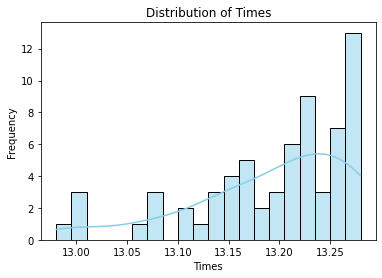

In [30]:
# Create a histogram using Seaborn
column_name = "Times"
sns.histplot(Mens110mHurdlesDF[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name}')

# Show the plot
plt.show()

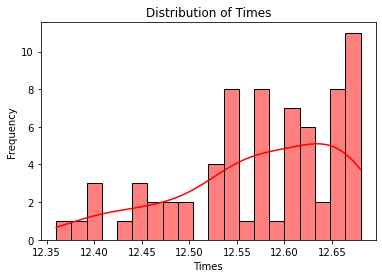

In [31]:
# Create a histogram using Seaborn
column_name = "Times"
sns.histplot(Women100mHurdlesDF[column_name], bins=20, kde=True, color='red', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name}')

# Show the plot
plt.show()

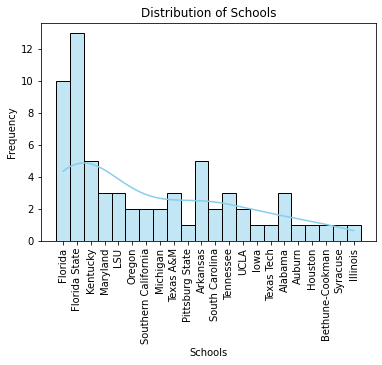

In [34]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(Mens110mHurdlesDF[column_name], bins=20, kde=True, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name}')

#Make names more readable
plt.xticks(rotation=90)


# Show the plot
plt.show()

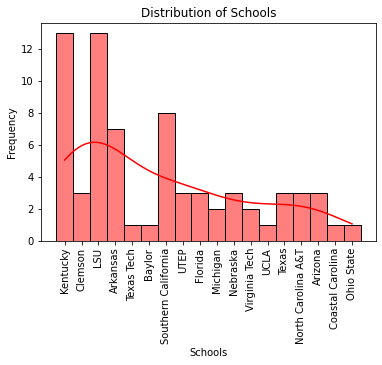

In [35]:
# Create a histogram using Seaborn
column_name = "Schools"
sns.histplot(Women100mHurdlesDF[column_name], bins=20, kde=True, color='red', edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_name}')

#Make names more readable
plt.xticks(rotation=90)

# Show the plot
plt.show()